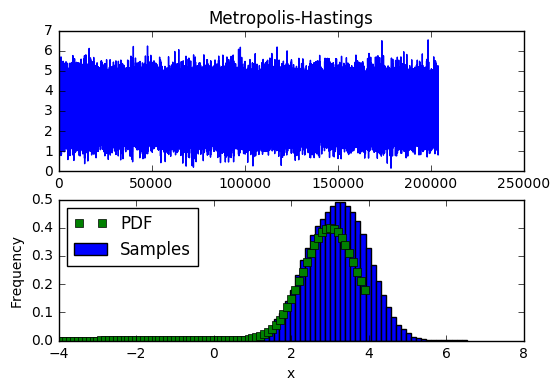

In [1]:
from math import *
import numpy as np
from matplotlib.pylab import *
import random
def tar(z):
    return exp(-(z-3)**2)/sqrt(2*pi)

mu = 1
n = 600000
sig = 2
x= 0.
vect = []
vect.append(x)
x_new = np.random.normal(mu,sig,n) #random inovation, uniform proposal distribution
for i in range(1,n):
    candidate = x + x_new[i] #candidate
    alpha = min(1.,tar(candidate)/tar(x)) #acceptance probability
    uni = np.random.uniform()
    if uni < alpha:
        x = candidate
        vect.append(x)

#plotting the results:
#theoretical curve
x = arange(-4,4,.1)
y = tar(x)
subplot(211)
title('Metropolis-Hastings')
plot(vect)
subplot(212)

hist(vect, bins=50,normed=1)
plot(x,y, 'gs')
ylabel('Frequency')
xlabel('x')
legend(('PDF','Samples'), loc = 'upper left')
show()


In [2]:
len(vect)
def expectation(vect) :
    out_arr = []
    for i in range (len(vect)) :
        pred=vect[i]**3+10*vect[i]
        out_arr.append(pred)
    return(np.mean(out_arr))
exp = expectation(vect)
exp

69.569185074262009

In [3]:
from math import *
import numpy as np
from matplotlib.pylab import *
import random
def mcmc(n):
    def tar1(z):
        return exp(-(z-3)**2)/sqrt(2*pi)

    mu = 1
    sig = 2
    x= 1
    vect1 = []
    vect1.append(x)
    x_new = np.random.normal(mu,sig,n) #random inovation, uniform proposal distribution
    for i in range(1,n):
        candidate = x + x_new[i] #candidate
        alpha = min(1.,tar(candidate)/tar(x)) #acceptance probability
        uni = np.random.uniform()
        if uni < alpha:
            x = candidate
            vect1.append(x)
    return(vect1)

plt = []
abc = []
for i in np.array([5000,100000,150000,250000,500000,600000,1000000]):
    y = mcmc(i)
    exp1 = expectation(y)
    plt.append(i)
    abc.append(exp1)
plt,abc


([5000, 100000, 150000, 250000, 500000, 600000, 1000000],
 [68.015231280431422,
  69.643760149295559,
  69.348462577364558,
  69.301393409775883,
  69.410324490306095,
  69.553162867204918,
  69.395252748554157])

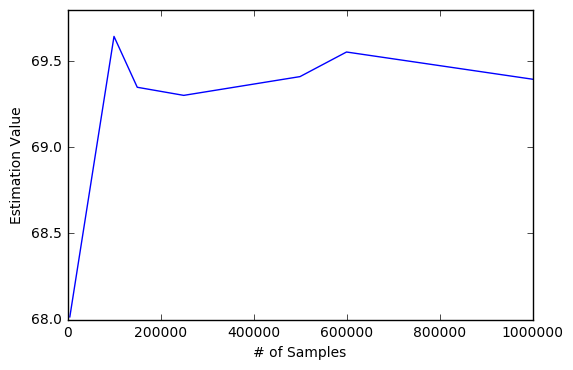

In [4]:
plot(plt,abc)
ylabel('Estimation Value')
xlabel('# of Samples')
show()